# Regression with Different Basis Functions

In [1]:
# general purpose python
import collections
import datetime
import glob
import importlib
import itertools
import json
import math
import os
import pickle
import random
import re
import shutil
import sys
import time
import warnings

# general purpose data science
import IPython
import ipywidgets as ipw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

# computer vision
import cv2
import imageio
import PIL
from PIL import *

# deep learning
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

# geospatial
import rasterio as rio
import rasterio.features

warnings.filterwarnings('ignore')

np.random.seed(1337)

mpl.rcParams['figure.dpi'] = 400

IPython.core.display.display(IPython.core.display.HTML("<style>.container { width:100% !important; }</style>"))

pd.options.display.max_colwidth = 32
pd.options.display.float_format = '{:,.6f}'.format
pd.options.display.expand_frame_repr = False

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

plotly.offline.init_notebook_mode(connected=True)
plotly.io.templates.default = 'plotly_white'

In [2]:
fsize=(25.0, 15.0)
linewidth = 1.5
dotsize = 20

### Define the True Function and Generate the Sample Data

In [3]:
def f(x):
    return math.sin(x)
print(f(math.pi / 2))

1.0


In [4]:
f_points = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
f_points['y'] = f_points.x.apply(f)

In [5]:
num_points = 20

In [6]:
sample = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
sample['y'] = sample.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

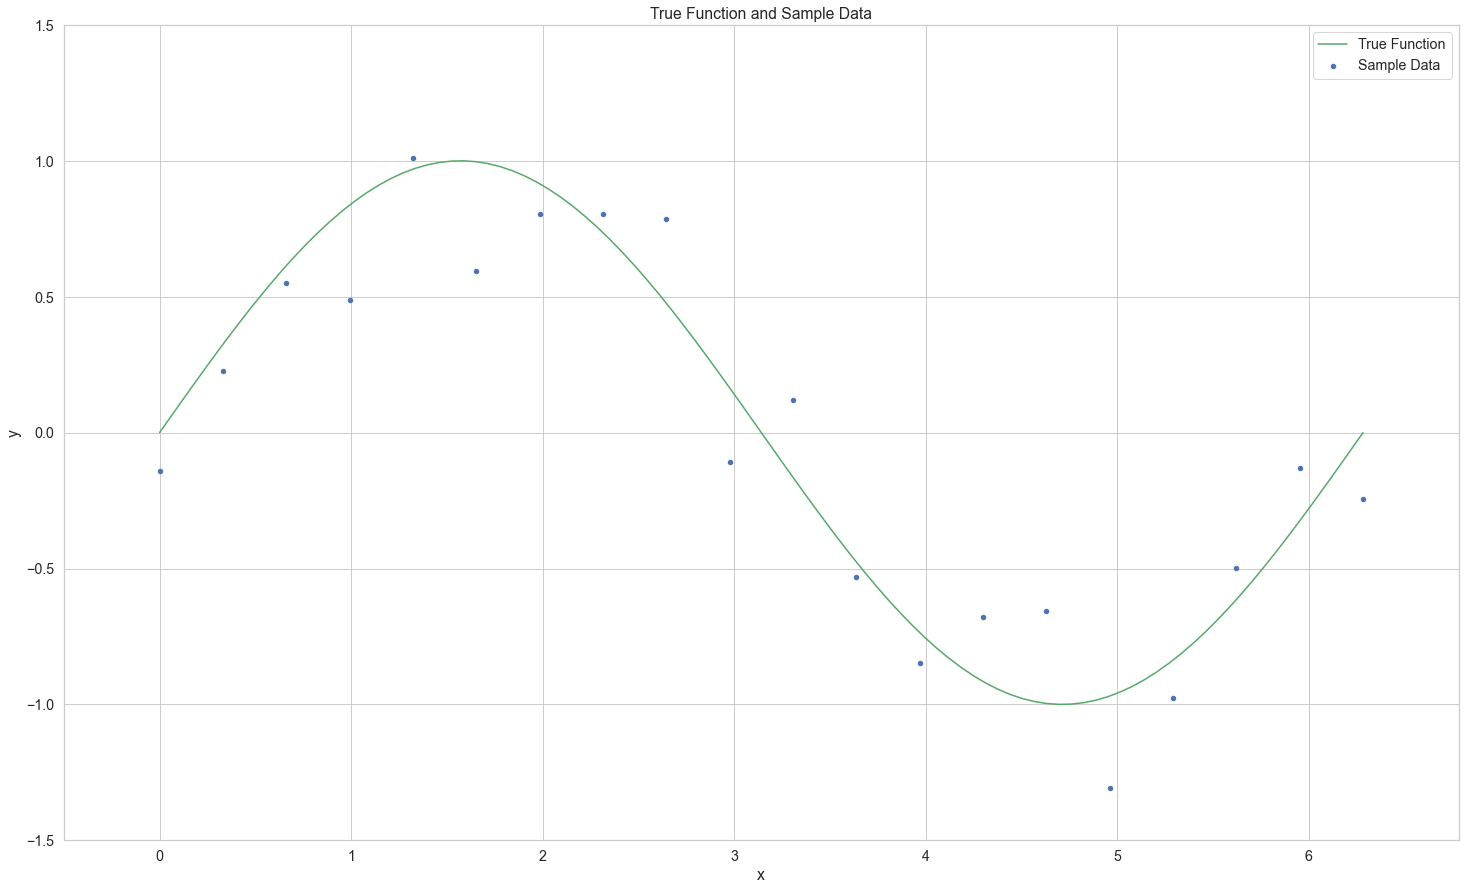

In [7]:
_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True Function and Sample Data')
_ = plt.legend(loc='upper right')

### Simple Linear Regression

In [8]:
def straight_line(x, a, b):
    return x*a + b

Fitting a straight line in the form of y(x) = ax + b
Parameter Estimates:
a = -0.2315800685074903
b = 0.6906029931881089


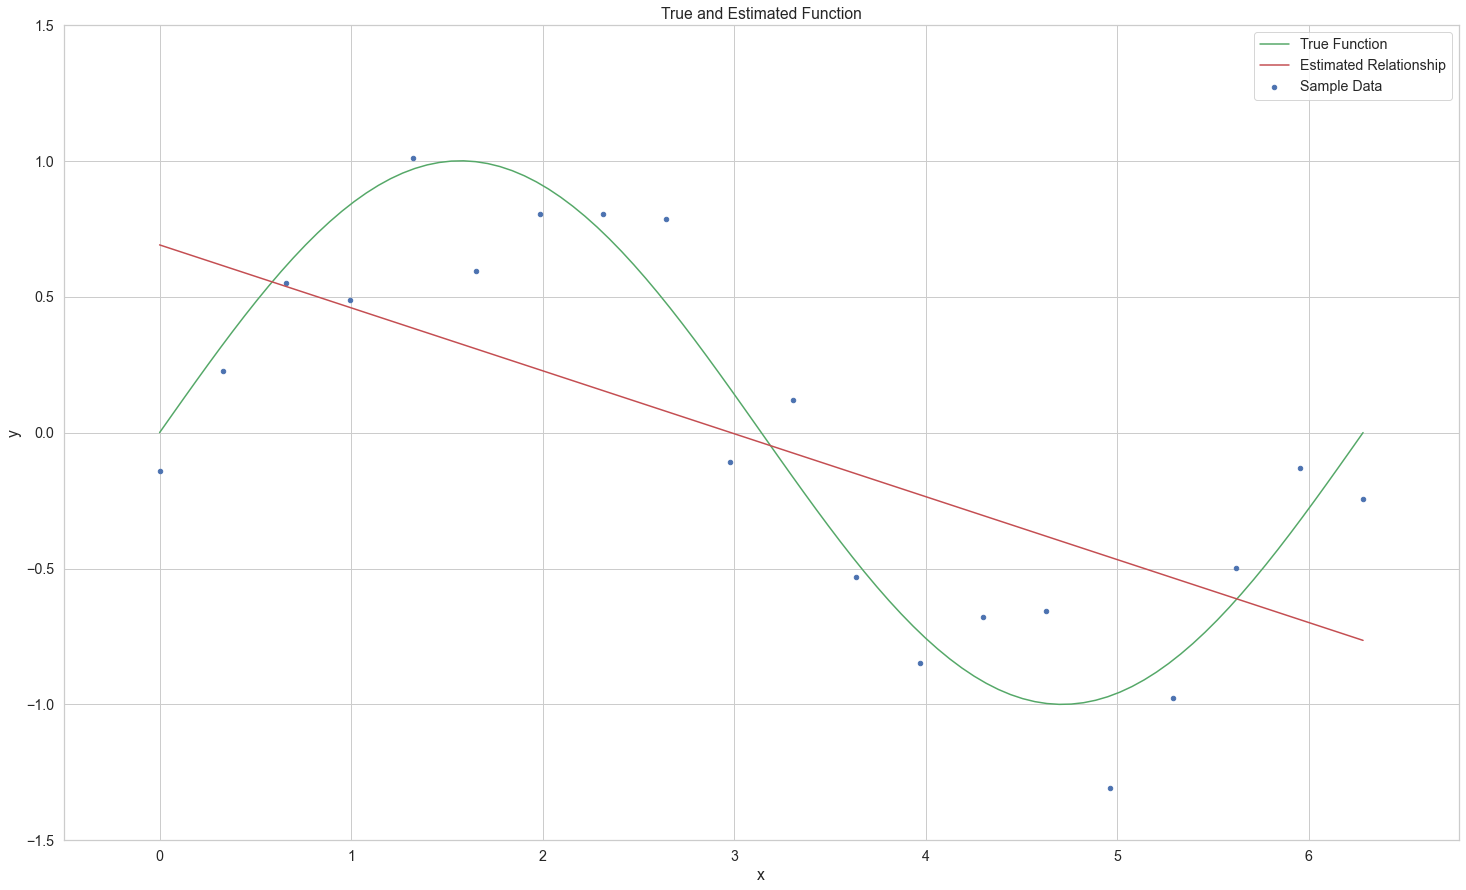

In [9]:
popt, pcov = scipy.optimize.curve_fit(straight_line, sample.x, sample.y)

print('Fitting a straight line in the form of y(x) = ax + b')

print('Parameter Estimates:')
print('a =', popt[0])
print('b =', popt[1])

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
pred['y'] = straight_line(pred.x, popt[0], popt[1])

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')

### Fit a Sigmoid

In [10]:
def sigmoid(x, a, b, c, d):
    return a / (1 + b * np.power(np.e, c - x)) + d

Fitting a logistic function in the form of y(x) = a / (1 + b * e^(c - x)) + d
Parameter Estimates:
a = 4.843117164502694
b = -0.13767644146333224
c = -0.06132728206003583
d = -4.99999999998823


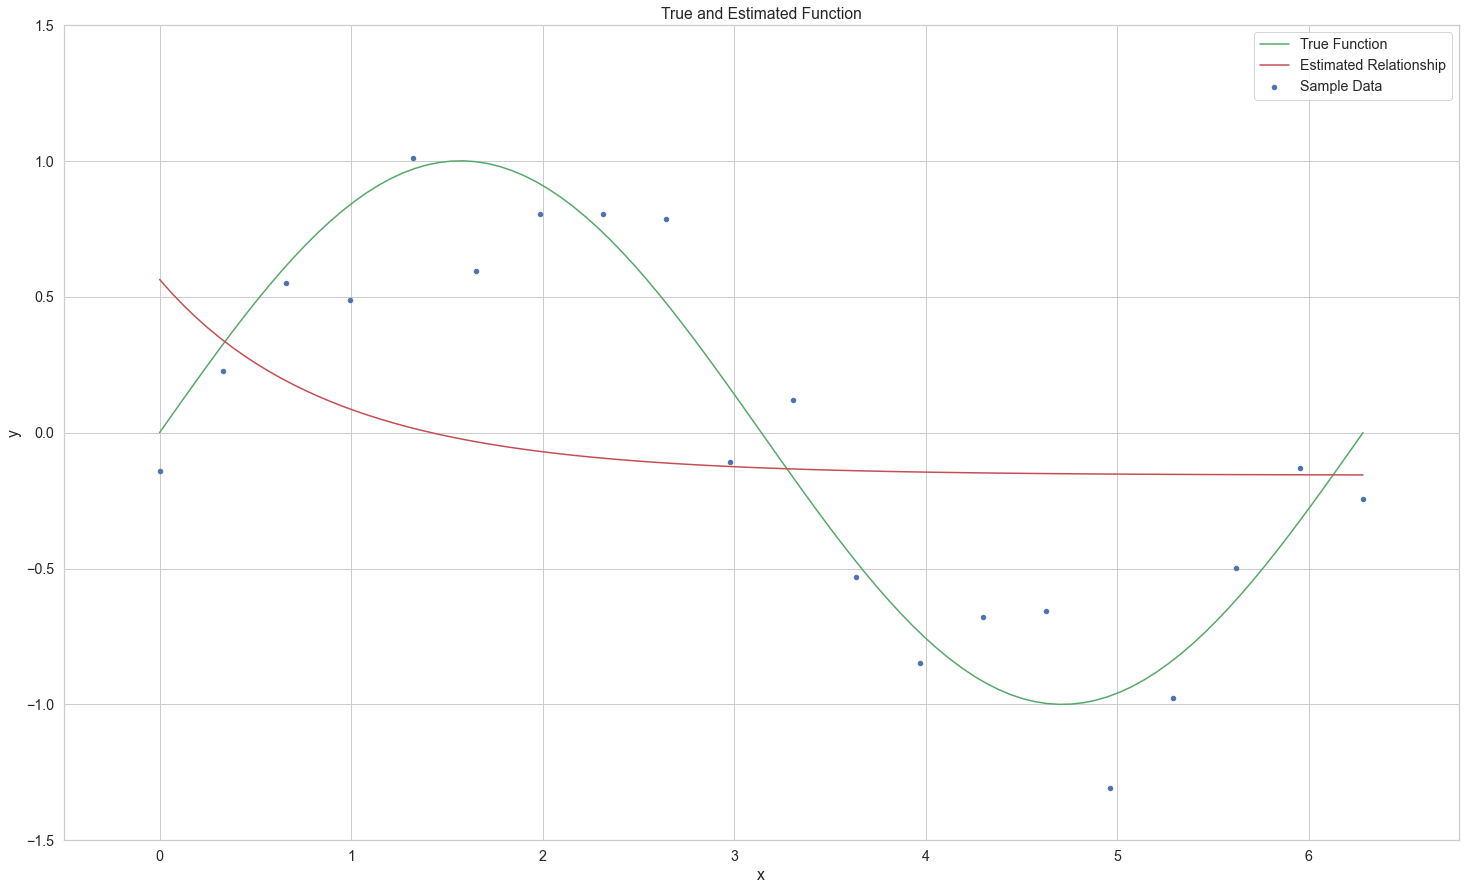

In [11]:
popt, pcov = scipy.optimize.curve_fit(sigmoid, sample.x, sample.y, bounds=(-5, 5))

print('Fitting a logistic function in the form of y(x) = a / (1 + b * e^(c - x)) + d')
print

print('Parameter Estimates:')
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
print('d =', popt[3])

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
pred['y'] = sigmoid(pred.x, popt[0], popt[1], popt[2], popt[3])

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')

### Fit two Gaussians

In [12]:
def gaussian(x, mu, sig2):
    return (1.0 / np.power(2 * sig2 * np.pi, 0.5)) * np.exp(-(np.power(x - mu, 2.)) / (2.0 * sig2))

def two_gaussians(x, a1, m1, s1, a2, m2, s2):
    return a1 * gaussian(x, m1, s1) + a2 * gaussian(x, m2, s2)

Fitting a logistic function in the form of y(x) = a1 * N(m1, s1) + a2 * N(m2, s2)

Parameter Estimates:
a1 = 1.3866071419602533
m1 = 1.4661779181302168
s1 = 0.41118132629369697
a2 = 0.6477048967866543
m2 = 2.4886394822432294
s2 = 0.008083643896451312


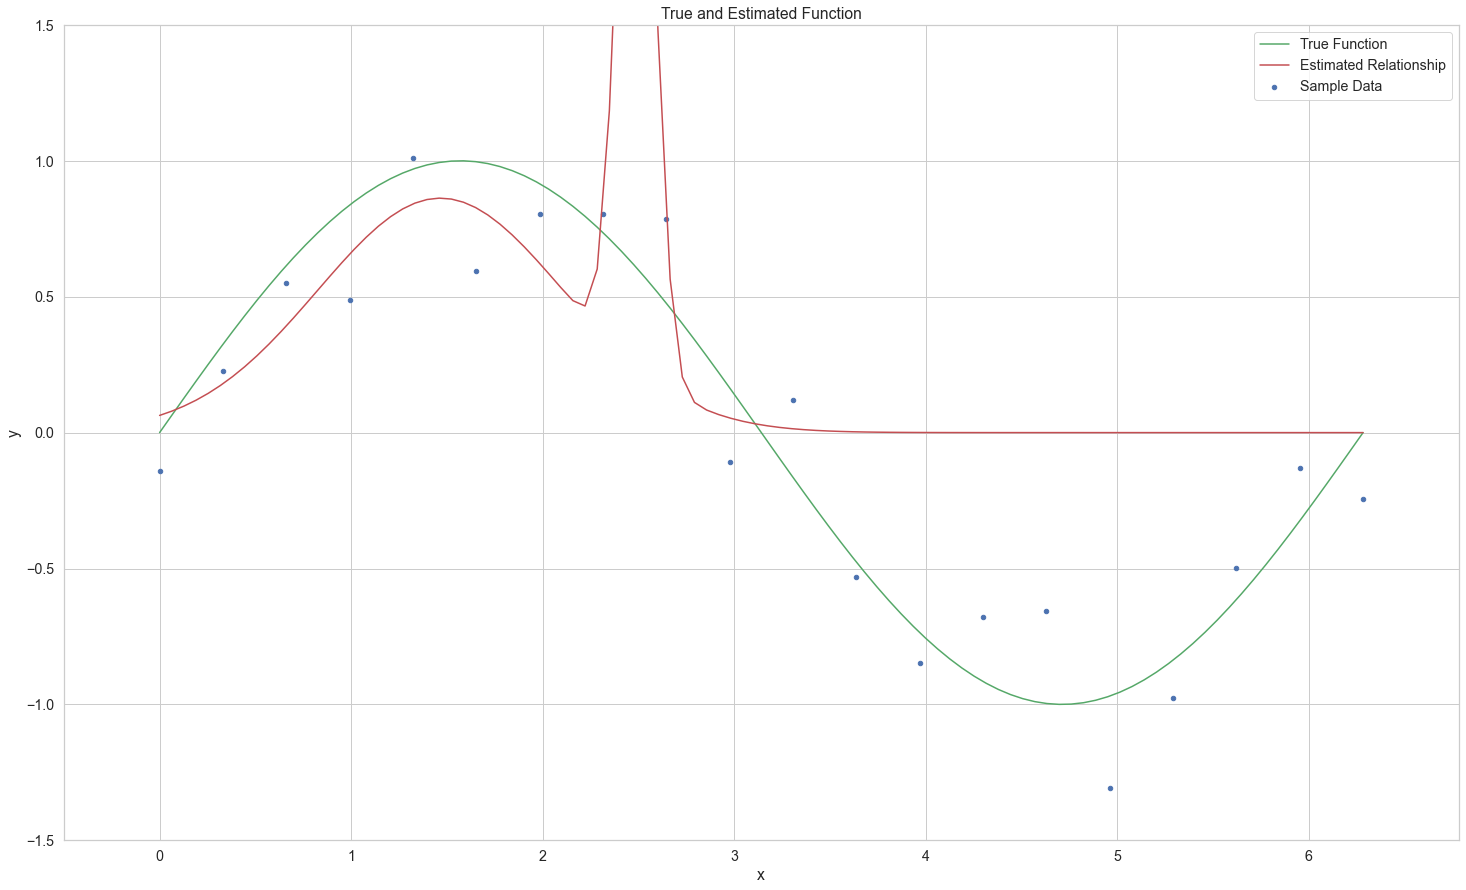

In [13]:
popt, pcov = scipy.optimize.curve_fit(two_gaussians, sample.x, sample.y)

print('Fitting a logistic function in the form of y(x) = a1 * N(m1, s1) + a2 * N(m2, s2)')
print()

print('Parameter Estimates:')
print('a1 =', popt[0])
print('m1 =', popt[1])
print('s1 =', popt[2])
print('a2 =', popt[3])
print('m2 =', popt[4])
print('s2 =', popt[5])

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
pred['y'] = two_gaussians(pred.x, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')